# MACHINE LEARNING

In this section, we are trying to build a model to predict our target column by using ML algorithms.

In [23]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
#Data Loading

data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### DATA PREPROCESSING

I will first convert '?' into 'Not available'.

In [26]:
data[data=='?'] = np.nan
data = data.fillna('Not available')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Not available,77053,HS-grad,9,Widowed,Not available,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Not available,186061,Some-college,10,Widowed,Not available,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [27]:
cat_col = data[['workclass','education','marital.status',
                                    'occupation','relationship','race','sex','native.country']]

num_cal = data[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']]


target_col = data[['income']]

I used dummy variables on only categorical columns in order to label columns and convert strings into numeric variables.

In [28]:
cat_col = pd.get_dummies(cat_col,drop_first=True)
cat_col.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Not available,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


I also standardized numerical columns.Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cal = pd.DataFrame(data=sc.fit_transform(num_cal),columns=['age','fnlwgt','education.num',
                                                               'capital.gain','capital.loss','hours.per.week'])
num_cal.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429


In [30]:
target_col = target_col['income'].map({'<=50K': 0, '>50K': 1})

I merged then three data and got a dataset that is ready to be worked for further ML algorithms.

In [31]:
data = pd.concat([num_cal,target_col,cat_col],axis=1)
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Not available,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
#Seting feature and target columns

x = data.drop(['income'],axis=1).values
y = data['income'].values

In [33]:
#Split data as train and test set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 38)

Now,let`s see some Ml algorithms that will give us higher accuracy.

### DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',random_state=38)
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[6515,  929],
       [ 868, 1457]])

In [35]:
round(accuracy_score(y_test,y_pred),4)

0.8161

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[6729,  715],
       [ 903, 1422]])

In [37]:
round(accuracy_score(y_test,y_pred),4)

0.8344

### RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=38)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[6934,  510],
       [ 994, 1331]])

In [39]:
round(accuracy_score(y_test,y_pred),4)

0.846

### SUPPORT VECTOR MACHINE

In [40]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',random_state=38)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[6944,  500],
       [1005, 1320]])

In [41]:
round(accuracy_score(y_test,y_pred),4)

0.8459

### LOGISTIC REGRESSION

In [42]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegressionCV

logr = LogisticRegressionCV(random_state=38)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[6908,  536],
       [ 930, 1395]])

In [43]:
round(accuracy_score(y_test,y_pred),4)

0.8499

### GRADIENTBOOSTING CLASSIFIER

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=38)
gbc.fit(X_train,y_train)

y_pred = gbc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[7041,  403],
       [ 911, 1414]])

In [45]:
round(accuracy_score(y_test,y_pred),4)

0.8655

### DIMENSION REDUCTION

### PCA

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)

X_train2 = pca.fit_transform(X_train) #Differ from LDA#
X_test2 = pca.transform(X_test)

#Before pca
logr = LogisticRegressionCV(random_state=38)
logr.fit(X_train,y_train)

#after pca
logr_pca = LogisticRegressionCV(random_state=38)
logr_pca.fit(X_train2,y_train)


y_pred = logr.predict(X_test)
y_pred2 = logr_pca.predict(X_test2)


#Accuracy score before pca

round(accuracy_score(y_test,y_pred),4)

0.8499

In [47]:
#Accuracy score after pca
cm2 = confusion_matrix(y_test,y_pred2)
round(accuracy_score(y_test,y_pred2),4)

0.8457

### LDA

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=15)
X_train_lda = lda.fit_transform(X_train,y_train)    #Differ from PCA#
X_test_lda = lda.transform(X_test)


#after lda
logr_lda = LogisticRegressionCV(random_state=38)
logr_lda.fit(X_train_lda,y_train)

y_pred_lda = logr_lda.predict(X_test_lda)

In [49]:
round(accuracy_score(y_test,y_pred_lda),4)

0.8387

### K-fold Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator=gbc,X=X_train,y=y_train,cv=10)
round(cvs.mean(),4)

0.8662

### XGBOOST

In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_predxgb = xgb.predict(X_test)

cm = confusion_matrix(y_test,y_predxgb)
cm

array([[7074,  370],
       [ 935, 1390]])

In [52]:
round(accuracy_score(y_test,y_predxgb),4)

0.8664

I decided to use XGBoost. I will tune the model define hperparameters explicitly in order to get higher result.

### MODEL TUNING

In [53]:
#Import necessary modules
from sklearn.model_selection import RandomizedSearchCV

# Setup the hyperparameter grid

p = {'n_estimators':[50,100,150],
          'min_child_weight': [1, 5, 10],
          'learning_rate':[0.05,0.1,0.15,0.2],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'max_depth': [3, 4, 5]
        }

# Instantiate a XGBoosting classifier
xgb = XGBClassifier(random_state=38)

# Instantiate the RandomizedSearchCV object
gs = RandomizedSearchCV(estimator = xgb,param_distributions= p,scoring='accuracy',cv=5,random_state=38)

# Fit it to the data
gs.fit(X_train,y_train)

# Print the tuned parameters and score
print('Tuned XGboosting Parameters: {}'.format(gs.best_params_))
print("Best score is {}".format(gs.best_score_))

Tuned XGboosting Parameters: {'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 1}
Best score is 0.8715777465777466


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predxgb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7444
           1       0.79      0.60      0.68      2325

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769



### ANALYSIS OF TABLE ABOVE

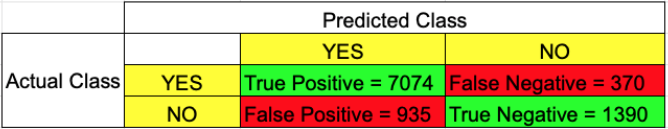

The first metric we look as a datascientist is accuracy = 87%. It looks awesome but it is insufficent 
if we check merely accuracy.There are other concepts to analyze our dataset being health enough as well.
Let`s dive into it. 

        Precision: Precision is a good measure to determine, when the costs of False Positive is high. Since our false positive value,precision can be good interpreter in here.It is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of people that labeled as below 50K, how many of them actually below 50K? or of labeled as above 50K, how many of them actually above 50K?
        
        In here almost 90% of correct prediction on <=50K and almost 80% correct prediction on >50K.These high precisions make our model more reliable.
        
        Recall: Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.Especially predicting 95% correct on people below 50K is incredible estimation while other group needs to be worked much on it.
        
        F1-Score: It is required when we seek a balance between Precision and Recall.It is a harmonic mean of both precision and recall.F1-score for the both groups especially people who have income below 50K is very high.
        
        Overall with %87 accuracy, we built very good model by ML algorithms.